# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [3]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

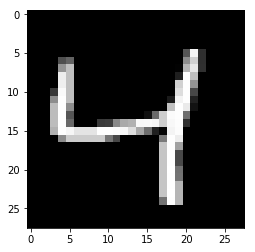

In [5]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [8]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32

image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer
encoded = tf.contrib.layers.fully_connected(inputs_, encoding_dim, activation_fn=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from
decoded = tf.nn.sigmoid(logits, name='output')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [10]:
# Create the session
sess = tf.Session()
sess.run(tf.global_variables_initializer())

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss and the test loss afterwards. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [16]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6951
Epoch: 1/20... Training loss: 0.6916
Epoch: 1/20... Training loss: 0.6886
Epoch: 1/20... Training loss: 0.6851
Epoch: 1/20... Training loss: 0.6806
Epoch: 1/20... Training loss: 0.6755
Epoch: 1/20... Training loss: 0.6699
Epoch: 1/20... Training loss: 0.6624
Epoch: 1/20... Training loss: 0.6536
Epoch: 1/20... Training loss: 0.6440
Epoch: 1/20... Training loss: 0.6315
Epoch: 1/20... Training loss: 0.6186
Epoch: 1/20... Training loss: 0.6046
Epoch: 1/20... Training loss: 0.5887
Epoch: 1/20... Training loss: 0.5740
Epoch: 1/20... Training loss: 0.5561
Epoch: 1/20... Training loss: 0.5378
Epoch: 1/20... Training loss: 0.5210
Epoch: 1/20... Training loss: 0.5040
Epoch: 1/20... Training loss: 0.4838
Epoch: 1/20... Training loss: 0.4681
Epoch: 1/20... Training loss: 0.4464
Epoch: 1/20... Training loss: 0.4309
Epoch: 1/20... Training loss: 0.4176
Epoch: 1/20... Training loss: 0.4081
Epoch: 1/20... Training loss: 0.3965
Epoch: 1/20... Training loss: 0.3790
E

Epoch: 1/20... Training loss: 0.1947
Epoch: 1/20... Training loss: 0.1911
Epoch: 1/20... Training loss: 0.1898
Epoch: 1/20... Training loss: 0.1872
Epoch: 1/20... Training loss: 0.1871
Epoch: 1/20... Training loss: 0.1883
Epoch: 1/20... Training loss: 0.1921
Epoch: 1/20... Training loss: 0.1900
Epoch: 1/20... Training loss: 0.1869
Epoch: 1/20... Training loss: 0.1855
Epoch: 1/20... Training loss: 0.1880
Epoch: 1/20... Training loss: 0.1920
Epoch: 1/20... Training loss: 0.1891
Epoch: 1/20... Training loss: 0.1829
Epoch: 1/20... Training loss: 0.1901
Epoch: 1/20... Training loss: 0.1878
Epoch: 1/20... Training loss: 0.1933
Epoch: 1/20... Training loss: 0.1883
Epoch: 1/20... Training loss: 0.1914
Epoch: 1/20... Training loss: 0.1931
Epoch: 1/20... Training loss: 0.1841
Epoch: 1/20... Training loss: 0.1868
Epoch: 1/20... Training loss: 0.1873
Epoch: 1/20... Training loss: 0.1853
Epoch: 1/20... Training loss: 0.1897
Epoch: 1/20... Training loss: 0.1844
Epoch: 1/20... Training loss: 0.1853
E

Epoch: 2/20... Training loss: 0.1623
Epoch: 2/20... Training loss: 0.1571
Epoch: 2/20... Training loss: 0.1546
Epoch: 2/20... Training loss: 0.1524
Epoch: 2/20... Training loss: 0.1522
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1541
Epoch: 2/20... Training loss: 0.1634
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1497
Epoch: 2/20... Training loss: 0.1536
Epoch: 2/20... Training loss: 0.1510
Epoch: 2/20... Training loss: 0.1570
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1582
Epoch: 2/20... Training loss: 0.1494
Epoch: 2/20... Training loss: 0.1500
Epoch: 2/20... Training loss: 0.1512
Epoch: 2/20... Training loss: 0.1493
Epoch: 2/20... Training loss: 0.1531
Epoch: 2/20... Training loss: 0.1527
Epoch: 2/20... Training loss: 0.1503
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1530
Epoch: 2/20... Training loss: 0.1546
Epoch: 2/20... Training loss: 0.1562
Epoch: 2/20... Training loss: 0.1492
E

Epoch: 3/20... Training loss: 0.1380
Epoch: 3/20... Training loss: 0.1297
Epoch: 3/20... Training loss: 0.1338
Epoch: 3/20... Training loss: 0.1385
Epoch: 3/20... Training loss: 0.1314
Epoch: 3/20... Training loss: 0.1419
Epoch: 3/20... Training loss: 0.1300
Epoch: 3/20... Training loss: 0.1408
Epoch: 3/20... Training loss: 0.1315
Epoch: 3/20... Training loss: 0.1406
Epoch: 3/20... Training loss: 0.1359
Epoch: 3/20... Training loss: 0.1391
Epoch: 3/20... Training loss: 0.1323
Epoch: 3/20... Training loss: 0.1377
Epoch: 3/20... Training loss: 0.1335
Epoch: 3/20... Training loss: 0.1351
Epoch: 3/20... Training loss: 0.1377
Epoch: 3/20... Training loss: 0.1388
Epoch: 3/20... Training loss: 0.1372
Epoch: 3/20... Training loss: 0.1395
Epoch: 3/20... Training loss: 0.1385
Epoch: 3/20... Training loss: 0.1375
Epoch: 3/20... Training loss: 0.1362
Epoch: 3/20... Training loss: 0.1342
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1383
Epoch: 3/20... Training loss: 0.1298
E

Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1222
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1206
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1226
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1268
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1166
Epoch: 4/20... Training loss: 0.1197
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1252
E

Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1132
Epoch: 4/20... Training loss: 0.1151
Epoch: 4/20... Training loss: 0.1130
Epoch: 4/20... Training loss: 0.1131
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1156
Epoch: 4/20... Training loss: 0.1114
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1137
Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1137
Epoch: 4/20... Training loss: 0.1161
Epoch: 5/20... Training loss: 0.1155
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1146
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1171
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1171
Epoch: 5/20... Training loss: 0.1128
Epoch: 5/20... Training loss: 0.1161
Epoch: 5/20... Training loss: 0.1117
E

Epoch: 5/20... Training loss: 0.1070
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1060
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1067
Epoch: 5/20... Training loss: 0.1052
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1071
Epoch: 5/20... Training loss: 0.1054
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1071
Epoch: 5/20... Training loss: 0.1109
E

Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1085
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1081
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1088
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1094
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1020
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1022
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.1072
E

Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.0980
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1046
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1040
Epoch: 7/20... Training loss: 0.1056
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1053
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1002
E

Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.1011
Epoch: 8/20... Training loss: 0.1026
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.1022
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0954
E

Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.1028
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.1027
Epoch: 8/20... Training loss: 0.0953
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.1037
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0950
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0927
E

Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0991
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.1004
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0921
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0965
E

Epoch: 10/20... Training loss: 0.1007
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0994
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0983
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0918
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0912
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0990
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0993
Epoch: 11/20... Training loss: 0.0918
Epoch: 11/20... Training loss: 0.0913
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0981
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0990
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0983
Epoch: 11/20... Training loss: 0.0984
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0912
Epoch: 11/20... Training loss: 0.0980
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0913
Epoch: 11/20... Training loss: 0.0913
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.1002
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0978
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0914
Epoch: 12/20... Training loss: 0.0910
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0975
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0900
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0977
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0975
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20... Training loss: 0.0898
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0904
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0972
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0990
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0902
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0898
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0905
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0910
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0906
Epoch: 14/20... Training loss: 0.0980
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0902
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0899
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0903
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0900
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0971
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0967
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0900
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0967
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0969
Epoch: 16/20... Training loss: 0.0901
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0893
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0987
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0982
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0982
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0971
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0901
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0966
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0891
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0899
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0967
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0890
Epoch: 18/20... Training loss: 0.0883
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0976
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0900
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0972
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0961
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0968
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0895
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0896
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0901
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0967
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

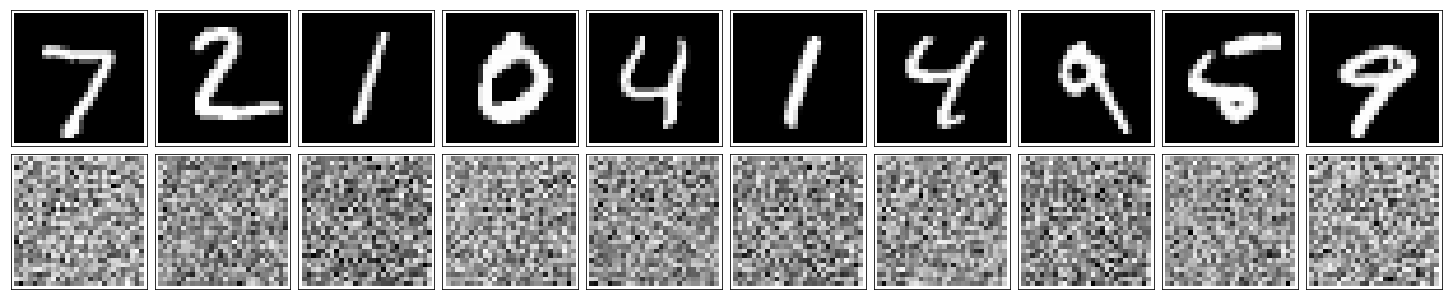

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.